In [ ]:
import tensorflow as tf
!pip install googlefinance
!pip install keras
!pip install tensorflow
import tensorflow as tf
from googlefinance import getQuotes
import json
import requests
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import csv
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for googlefinance: filename=googlefinance-0.7-py3-none-any.whl size=2562 sha256=c09f121f9fa3209617ccfc35b0b004ca2bd9ed485d3b610d2e796fc3504ed614
  Stored in directory: /root/.cache/pip/wheels/40/ea/e4/14ef314e3d37a0545a3556c17b445445bee5750ab24338cbb8
Successfully built googlefinance
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


api key(alphavantage):IKKHXVLWKBOYK8EE

In [ ]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AAPL&outputsize=full&interval=5min&apikey=IKKHXVLWKBOYK8EE'
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=IBM&interval=15min&slice=year1month1&apikey=IKKHXVLWKBOYK8EE'
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&outputsize=full&apikey=IKKHXVLWKBOYK8EE'
r = requests.get(url)
data = r.json()
data2 = data.get("Time Series (5min)")
#print(data2)
print(len(data2))
arr = np.array([])
for i in data2.keys():
  data3 = data2.get(i)
  arr = np.append(arr, float(data3.get("4. close")))
  arr = np.append(arr, float(data3.get("1. open")))

reversed_arr = arr[::-1]

print(arr)
df = reversed_arr.reshape(-1,1)
print(np.shape(reversed_arr))
print(type(reversed_arr[0]))
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
print(np.shape(dataset_train))
print(np.shape(dataset_test))

3657
[180.49   180.53   180.5301 ... 165.6696 165.6796 165.7894]
(7314,)
<class 'numpy.float64'>
(5851, 1)
(1463, 1)


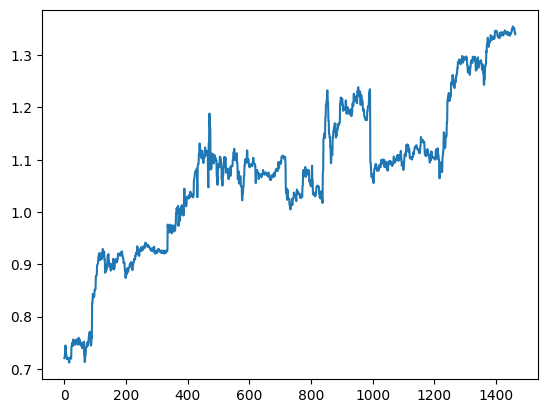

In [ ]:
x_ticks = [60, 80, 100, 120, 140, 160, 180]
plt.plot(dataset_test)
plt.locator_params(axis = 'y', nbins = 10)
plt.show()

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

[[[0.12090227]
  [0.11179666]
  [0.11096737]
  ...
  [0.06624373]
  [0.0687316 ]
  [0.07039018]]

 [[0.11179666]
  [0.11096737]
  [0.09605672]
  ...
  [0.0687316 ]
  [0.07039018]
  [0.0786665 ]]

 [[0.11096737]
  [0.09605672]
  [0.09025998]
  ...
  [0.07039018]
  [0.0786665 ]
  [0.08943898]]

 ...

 [[0.71140689]
  [0.70808973]
  [0.70974831]
  ...
  [0.7022847 ]
  [0.71721193]
  [0.72633412]]

 [[0.70808973]
  [0.70974831]
  [0.71804122]
  ...
  [0.71721193]
  [0.72633412]
  [0.72135838]]

 [[0.70974831]
  [0.71804122]
  [0.71721193]
  ...
  [0.72633412]
  [0.72135838]
  [0.71887051]]]


In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
182/182 [==============================] - 9s 12ms/step - loss: 0.0117
Epoch 2/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0032
Epoch 3/100
182/182 [==============================] - 3s 16ms/step - loss: 0.0027
Epoch 4/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0026
Epoch 5/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0024
Epoch 6/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0024
Epoch 7/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0021
Epoch 8/100
182/182 [==============================] - 3s 16ms/step - loss: 0.0020
Epoch 9/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0020
Epoch 10/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0018
Epoch 11/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0017
Epoch 12/100
182/182 [==============================] - 2s 12ms/step - loss: 0.0016
E

45/45 [==============================] - 2s 8ms/step


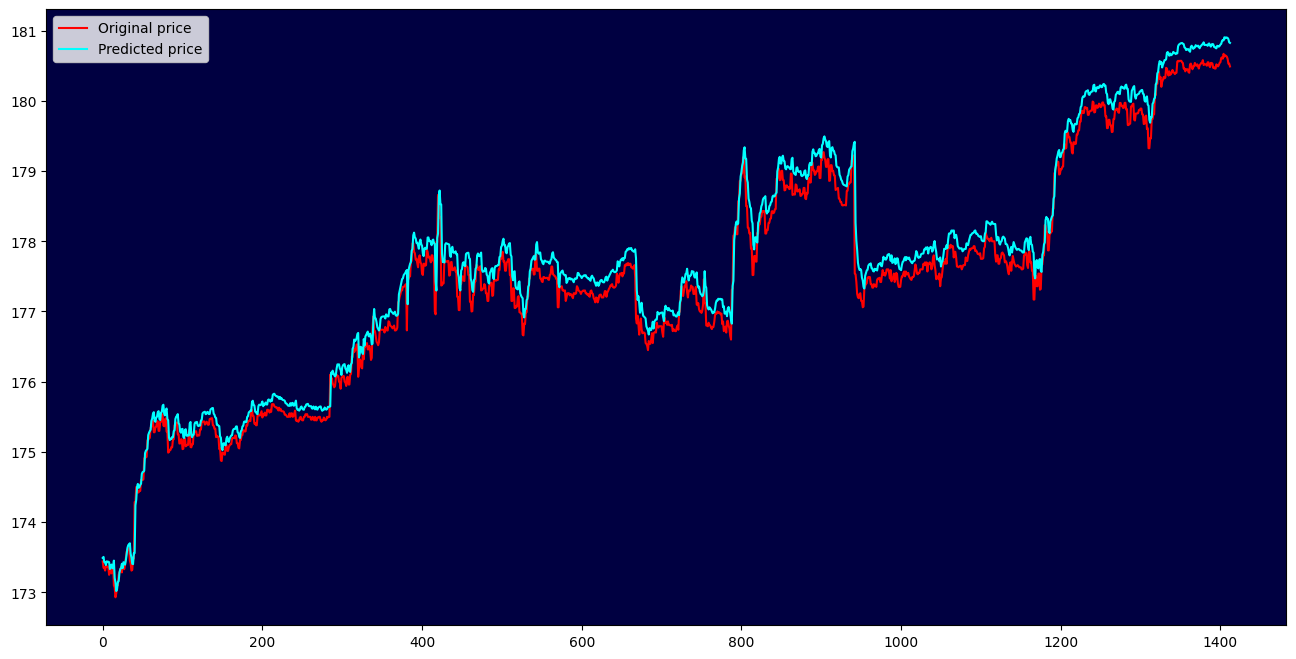

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [ ]:
import time
url = "https://financialmodelingprep.com/api/v3/quote-short/AAPL?apikey=fa282a905cbb7efae56551271a4141cf"
why = True
while(why == True):
  r = requests.get(url)
  r = r.json()
  data = r[0]
  #print(type(data))
  price = data.get("price")
  df = df.reshape(-1,1)
  totest = df[-50:]
  #print(np.shape(totest))
  totest = scaler.transform(totest)
  totest = np.expand_dims(totest, axis=0)
  #print(totest)
  prediction = model.predict(totest)
  prediction = scaler.inverse_transform(prediction)
  print("expected price:" + str(price))
  print("predicted price:" + str(prediction))
  print("percent error:" + str((abs(price-prediction))/price*100) +"%")
  array = np.array([price])
  #print(array)
  array = array.reshape(-1,1)
  #print(np.shape(array))
  print(df)
  df = np.append(df, array)
  time.sleep(10)


1/1 [==============================] - 0s 20ms/step
expected price:180.565
predicted price:[[180.61728]]
percent error:[[0.02895168]]%
[[165.7894]
 [165.6796]
 [165.6696]
 ...
 [180.3441]
 [180.325 ]
 [180.32  ]]
1/1 [==============================] - 0s 21ms/step
expected price:180.5675
predicted price:[[180.76704]]
percent error:[[0.1105067]]%
[[165.7894]
 [165.6796]
 [165.6696]
 ...
 [180.325 ]
 [180.32  ]
 [180.565 ]]
1/1 [==============================] - 0s 21ms/step
expected price:180.585
predicted price:[[180.79222]]
percent error:[[0.11474616]]%
[[165.7894]
 [165.6796]
 [165.6696]
 ...
 [180.32  ]
 [180.565 ]
 [180.5675]]
1/1 [==============================] - 0s 24ms/step
expected price:180.585
predicted price:[[180.818]]
percent error:[[0.1290176]]%
[[165.7894]
 [165.6796]
 [165.6696]
 ...
 [180.565 ]
 [180.5675]
 [180.585 ]]
1/1 [==============================] - 0s 24ms/step
expected price:180.475
predicted price:[[180.82652]]
percent error:[[0.19477308]]%
[[165.7894]
 [16

KeyboardInterrupt: ignored